In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from matplotlib import rc

In [3]:
rc('font', family='Malgun Gothic')
df = pd.read_csv('../resData/치킨집가공.csv', encoding='utf-8')
jongro_df = df[df['소재지전체주소'].str.contains('종로구', na=False)]


In [4]:
# 동이름 추출
jongro_df['동이름'] = jongro_df['소재지전체주소'].apply(
    lambda addr: next((w for w in addr.split() if w.endswith(('동', '가'))), '')
)


In [5]:
d_counts = jongro_df['동이름'].value_counts()
d_counts = d_counts[d_counts >= 4]

In [6]:
# 라벨/크기 리스트 생성
labels = [f"{dong} ({cnt})" for dong, cnt in d_counts.items()]
sizes = d_counts.values

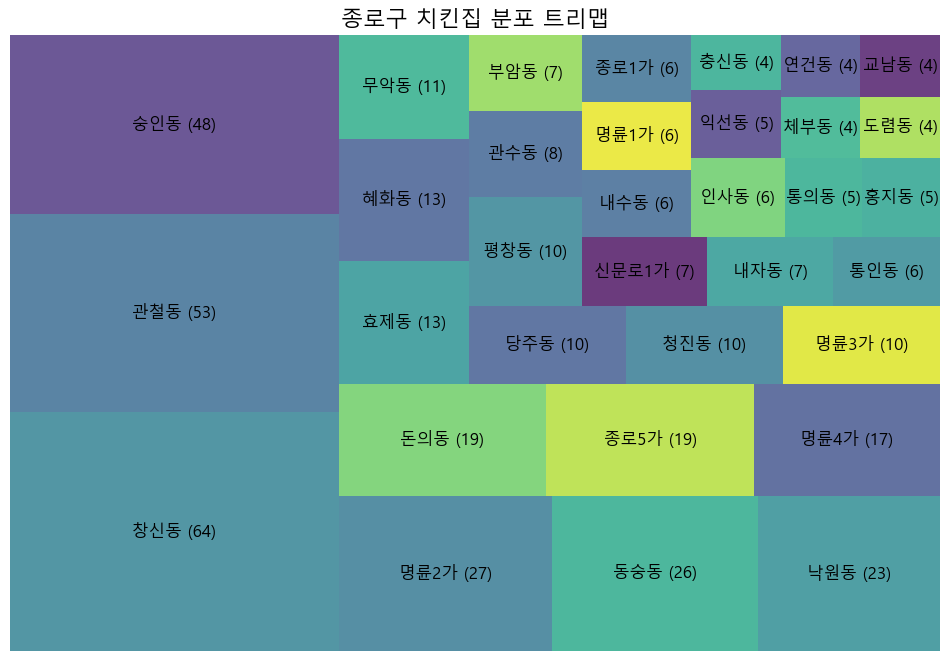

In [7]:
# 트리맵 시각화
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, text_kwargs={'fontsize': 12})
plt.axis('off')
plt.title('종로구 치킨집 분포 트리맵', fontsize=16)
plt.show()
